In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def normOfDiference(list1,list2):
    arr1=np.array(list1)
    arr2=np.array(list2)
    dif=np.subtract(arr1,arr2)
    return round(np.linalg.norm(dif),3)

allBestData_df=pd.read_excel("BestMedianResults.xlsx",index_col=0)





data={}
for ref in range(len(allBestData_df.columns)):   
    fila=[]
    list1=allBestData_df.iloc[-8:,ref].to_list()
    rowName=allBestData_df.iloc[-8:,ref].name
    for i in range(len(allBestData_df.columns)):
        list2=allBestData_df.iloc[-8:,i].to_list()
        fila.append(normOfDiference(list1,list2))
    data[rowName]=fila

relationMatrix=pd.DataFrame(data,index=allBestData_df.columns)
mIndex=[]
for i in relationMatrix.columns.to_list():
    mIndex.append((int(i[:4]),int(i[5:])))

# 
index = pd.MultiIndex.from_tuples(mIndex, names=["Year", "Week"])


RelationMatrix=pd.DataFrame(relationMatrix.values,index,columns=index)
AllBestData=pd.DataFrame(allBestData_df.values,allBestData_df.index,columns=index)
    


In [67]:
index


MultiIndex([(2015,  1),
            (2015, 10),
            (2015, 11),
            (2015, 12),
            (2015, 13),
            (2015, 14),
            (2015, 15),
            (2015, 16),
            (2015, 17),
            (2015, 18),
            ...
            (2020, 44),
            (2020, 45),
            (2020, 46),
            (2020, 47),
            (2020, 48),
            (2020, 49),
            (2020, 50),
            (2020, 51),
            (2020, 52),
            (2020, 53)],
           names=['Year', 'Week'], length=133)

In [68]:
"se pasa como input la semana y año de referencia"



def refTupleGenerator(refY,refW,Estrategy=1):
    WperYdict={2015:53,
          2016:52,
          2017:52,
          2018:52,
          2019:52,
          2020:53}
    data=[]
    if Estrategy==1:
        refYUpper=refY-1
        refWUpper=refW+2
        
        refYLower=refY-1
        refWLower=refW-2
        
        if refWLower<=0:
            refYLower-=1
            refWLower=WperYdict[refYLower]-refWLower
        elif refWUpper>WperYdict[refYLower]:
            refYUpper+=1
            refWUpper=refWUpper-WperYdict[refYLower]
            
        data=[(refYLower,refWLower),(refYUpper,refWUpper),(refY,refW)]
        
    if Estrategy==2:
        refYUpper=refY-1
        refWUpper=refW+2
        
        refYLower=refY-1
        refWLower=refW-2
        pass
    #print(data)
    return data
    

In [69]:
refTupleGenerator(2016,52,Estrategy=1)[0][0]

2015

In [70]:
REF=refTupleGenerator(2016,51,Estrategy=1)
print(REF)
RelationMatrix.loc[REF[0]:REF[1],REF[2]]

[(2015, 49), (2015, 53), (2016, 51)]


UnsortedIndexError: 'Key length (2) was greater than MultiIndex lexsort depth (1)'

In [22]:

RelationMatrix[2016,51][(2015,49):(2015,53)]

Year  Week
2015  49      11.323
      50      10.833
      51       7.261
      52       7.926
      53       8.399
Name: (2016, 51), dtype: float64

In [36]:
ref=52

RelationMatrix[2016,ref][2015].loc[ref-2:ref+2].idxmin()

51

In [49]:
"""Estrategia 1 """

ref=52


newRow=[RelationMatrix[2016,ref][2015].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-2:ref+2],
           RelationMatrix[2017,ref][2016].loc[ref-2:ref+2],
           RelationMatrix[2018,ref][2017].loc[ref-2:ref+2],
           RelationMatrix[2019,ref][2018].loc[ref-2:ref+2],
           RelationMatrix[2020,ref][2019].loc[ref-2:ref+2]],axis=1).sort_values("Week")


[51, 52, 51, 51, 50]


,2016,2017,2018,2019,2020
,52,52,52,52,52
Week,,,,,
50,12.303,12.212,11.275,15.035,11.160
51,8.383,9.226,6.521,10.037,12.804
52,12.065,3.183,10.608,15.870,11.588
53,10.979,NaN,NaN,NaN,NaN


[(2015, 38), (2015, 42), (2016, 40)]
Year  Week
2015  40      14.795
      41      15.553
      42       4.278
Name: (2016, 40), dtype: float64  hola
[(2016, 38), (2016, 42), (2017, 40)]
Year  Week
2015  40      14.795
      41      15.553
      42       4.278
Name: (2016, 40), dtype: float64  hola
[(2017, 38), (2017, 42), (2018, 40)]
Year  Week
2015  40      14.795
      41      15.553
      42       4.278
Name: (2016, 40), dtype: float64  hola
[(2018, 38), (2018, 42), (2019, 40)]
Year  Week
2015  40      14.795
      41      15.553
      42       4.278
Name: (2016, 40), dtype: float64  hola
[(2019, 38), (2019, 42), (2020, 40)]
Year  Week
2015  40      14.795
      41      15.553
      42       4.278
Name: (2016, 40), dtype: float64  hola


{'SlFactor': 3.12,
 'TpFactor': 5.36,
 'atrPeriod': 17.0,
 'delta': 0.28500000000000003,
 'option': 1.0,
 'fastEmaPeriod': 5.0,
 'slowEMAPeriod': 18.0,
 'vwapZoneMultiplyer': 4.0}

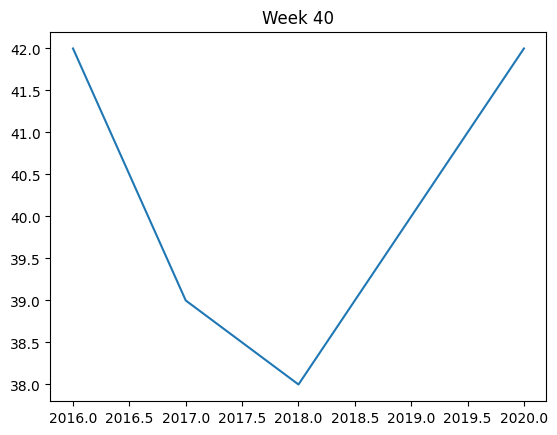

In [60]:
def ParamEstimator(ref,relationMatrix,allMedianResults,Estrategy=1,dropFistYear=False):
    years=[2016,2017,2018,2019,2020]
    if dropFistYear:years=years[1:]
    newRow=[]
    if Estrategy==1:
        for i in years:
            Ref=refTupleGenerator(i,ref,Estrategy)
            print(Ref)
            print(relationMatrix.loc[(2015, 38):(2015, 42),(2016, 40)], " hola")
            newRow.append(relationMatrix.loc[Ref[0]:Ref[1],Ref[2]].idxmin()[1])
         
    if Estrategy==2:   
        newRow=[relationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
        relationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
        relationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
        relationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
        relationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
        
    #print(newRow)
    pd.Series(newRow,years).plot(title='Week '+str(ref))
    if not(dropFistYear):
        W52=pd.concat([allMedianResults[years[0],newRow[0]],
        allMedianResults[years[1],newRow[1]],
        allMedianResults[years[2],newRow[2]],
        allMedianResults[years[3],newRow[3]],
        allMedianResults[years[4],newRow[4]]],axis=1).iloc[8:,:].T

    else:
        W52=pd.concat([allMedianResults[years[0],newRow[0]],
        allMedianResults[years[1],newRow[1]],
        allMedianResults[years[2],newRow[2]],
        allMedianResults[years[3],newRow[3]]],axis=1).iloc[8:,:].T

        

    new_configuration = {
    "SlFactor":W52.loc[:,"SlFactor"].mean(),
    "TpFactor":W52.loc[:,"TpFactor"].mean(),
    "atrPeriod":W52.loc[:,"atrPeriod"].median(),
    "delta":-1,
    "option":W52.loc[:,"option"].mode().iloc[0],
    "fastEmaPeriod":W52.loc[:,"fastEmaPeriod"].median(),
    "slowEMAPeriod":W52.loc[:,"slowEMAPeriod"].median(),
    "vwapZoneMultiplyer":W52.loc[:,"vwapZoneMultiplyer"].median()
    }

    if new_configuration["option"] == 2:
        new_configuration["delta"] = W52[W52.option==2].delta.mean()

    elif new_configuration["option"] == 1:
        new_configuration["delta"] = W52[W52.option==1].delta.mean()
    else:
        new_configuration["delta"] = 0

    return new_configuration

ParamEstimator(40,RelationMatrix,AllBestData,Estrategy=1,dropFistYear=False)

In [83]:
"""Estrategia 2"""

ref=50


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






[46, 46, 48, 48, 47]


,2016,2017,2018,2019,2020
,50,50,50,50,50
Week,,,,,
46,7.941,9.492,11.513,14.665,14.047
47,10.431,11.997,12.372,9.650,8.150
48,10.997,12.315,8.718,6.080,12.284
49,9.212,12.688,12.328,13.251,9.524
50,14.635,14.240,11.723,9.640,13.847


"""Estrategia 3"""

ref=43
ref-=1


newRow=[RelationMatrix[2016,ref][2015].loc[ref-4:ref].idxmin(),
           RelationMatrix[2017,ref][2016].loc[ref-4:ref].idxmin(),
           RelationMatrix[2018,ref][2017].loc[ref-4:ref].idxmin(),
           RelationMatrix[2019,ref][2018].loc[ref-4:ref].idxmin(),
           RelationMatrix[2020,ref][2019].loc[ref-4:ref].idxmin()]
print(newRow)
pd.concat([RelationMatrix[2016,ref][2015].loc[ref-4:ref],
           RelationMatrix[2017,ref][2016].loc[ref-4:ref],
           RelationMatrix[2018,ref][2017].loc[ref-4:ref],
           RelationMatrix[2019,ref][2018].loc[ref-4:ref],
           RelationMatrix[2020,ref][2019].loc[ref-4:ref]],axis=1).sort_values("Week")






{'SlFactor': 3.72,
 'TpFactor': 5.54,
 'atrPeriod': 19.0,
 'delta': 0.16599999999999998,
 'option': 2.0,
 'fastEmaPeriod': 5.0,
 'slowEMAPeriod': 14.0,
 'vwapZoneMultiplyer': 3.0}

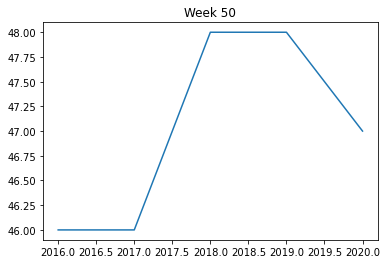

In [7]:
years=[2016,2017,2018,2019,2020]
pd.Series(newRow,years).plot(title='Week '+str(ref))

W52=pd.concat([AllBestData[years[0],newRow[0]],
    AllBestData[years[1],newRow[1]],
    AllBestData[years[2],newRow[2]],
    AllBestData[years[3],newRow[3]],
    AllBestData[years[4],newRow[4]]],axis=1).iloc[8:,:].T



new_configuration = {
    "SlFactor":W52.loc[:,"SlFactor"].mean(),
    "TpFactor":W52.loc[:,"TpFactor"].mean(),
    "atrPeriod":W52.loc[:,"atrPeriod"].median(),
    "delta":-1,
    "option":W52.loc[:,"option"].mode().iloc[0],
    "fastEmaPeriod":W52.loc[:,"fastEmaPeriod"].median(),
    "slowEMAPeriod":W52.loc[:,"slowEMAPeriod"].median(),
    "vwapZoneMultiplyer":W52.loc[:,"vwapZoneMultiplyer"].median()
}

if new_configuration["option"] == 2:
    new_configuration["delta"] = W52[W52.option==2].delta.mean()

elif new_configuration["option"] == 1:
    new_configuration["delta"] = W52[W52.option==1].delta.mean()
else:
    new_configuration["delta"] = 0
    
new_configuration


In [ ]:
for i in AllBestData[2016].columns.tolist():
    ref=i
    if ref 
